In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

### Carga data

In [2]:
infile = open('cleandata_pickle.pickle','rb')
data_clean = pickle.load(infile)
infile.close()

Agregar variables temporales

In [83]:
data_clean['dow_creacion'] = data_clean['dttm_creacion'].dt.dayofweek
data_clean['hora_creacion'] = data_clean['dttm_creacion'].dt.hour
data_clean['mes_creacion'] = data_clean['dttm_creacion'].dt.month
data_clean['año_creacion'] = data_clean['dttm_creacion'].dt.year
data_clean['fecha_creacion'] = data_clean['dttm_creacion'].dt.floor('D')
data_clean['dow_cierre'] = data_clean['dttm_cierre'].dt.dayofweek
data_clean['hora_cierre'] = data_clean['dttm_cierre'].dt.hour
data_clean['mes_cierre'] = data_clean['dttm_cierre'].dt.month
data_clean['año_cierre'] = data_clean['dttm_cierre'].dt.year
data_clean['fecha_cierre'] = data_clean['dttm_cierre'].dt.floor('D')
data_clean.head()

,folio,codigo_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,dttm_creacion,...,dow_creacion,hora_creacion,mes_creacion,año_creacion,dow_cierre,hora_cierre,mes_cierre,año_cierre,fecha_creacion,fecha_cierre
1164271,C4/131231/03508,A,alvaro obregon,lesionado_atropellado,19.33929,-99.25598,URGENCIAS MEDICAS,LLAMADA DEL 066,alvaro obregon,2013-12-31 23:21:38,...,1,23,12,2013,2,1,1,2014,2013-12-31,2014-01-01
1164423,C4/131231/02371,N,alvaro obregon,accidente_choque_sin_lesionados,19.37831,-99.20090,EMERGENCIA,LLAMADA DEL 066,alvaro obregon,2013-12-31 18:21:47,...,1,18,12,2013,3,0,1,2014,2013-12-31,2014-01-02
372612,C4/140101/04189,A,alvaro obregon,accidente_choque_con_lesionados,19.36336,-99.19104,URGENCIAS MEDICAS,LLAMADA DEL 066,alvaro obregon,2014-01-01 21:45:43,...,2,21,1,2014,2,23,1,2014,2014-01-01,2014-01-01
372622,C4/140101/04201,A,alvaro obregon,accidente_choque_sin_lesionados,19.36348,-99.19145,EMERGENCIA,LLAMADA DEL 066,alvaro obregon,2014-01-01 21:46:46,...,2,21,1,2014,2,21,1,2014,2014-01-01,2014-01-01
372628,C4/140101/01293,A,alvaro obregon,accidente_choque_sin_lesionados,19.38161,-99.20009,EMERGENCIA,LLAMADA DEL 066,alvaro obregon,2014-01-01 06:50:48,...,2,6,1,2014,2,8,1,2014,2014-01-01,2014-01-01


### Gráficas

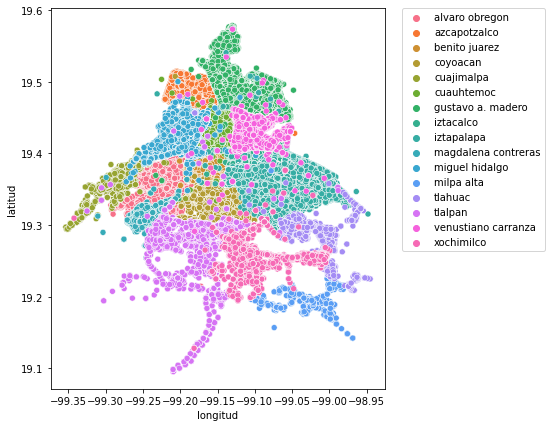

In [49]:
f = plt.subplots(figsize = (6,7))

sns.scatterplot(data = data_clean[data_clean['año_cierre'] == 2019] , y = "latitud", x = "longitud", hue = "delegacion_cierre")

ax = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Llamadas por día de la semana X hora de creación

In [45]:
dow_x_hora_creacion = data_clean[['dow_creacion', 'hora_creacion']].groupby(['dow_creacion', 'hora_creacion']).\
size().reset_index(name='n').pivot("hora_creacion", "dow_creacion","n")

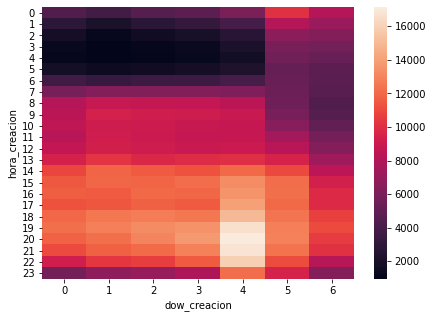

In [50]:
f = plt.subplots(figsize = (7,5))
ax = sns.heatmap(dow_x_hora_creacion)

Cuando más llamadas hay es los viernes entre 18 y 22 hrs. Cuando menos llamadas hay es de lunes a viernes de 12am a 6am

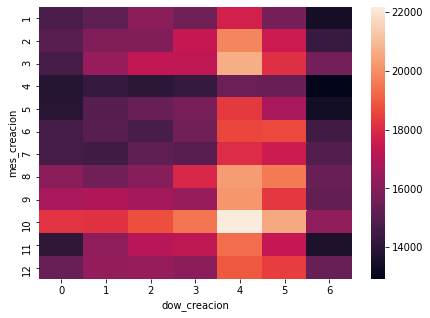

In [102]:
dow_x_mes_creacion = data_clean[['dow_creacion', 'mes_creacion']].groupby(['dow_creacion', 'mes_creacion']).\
size().reset_index(name='n').pivot("mes_creacion", "dow_creacion","n")

f = plt.subplots(figsize = (7,5))
ax = sns.heatmap(dow_x_mes_creacion)

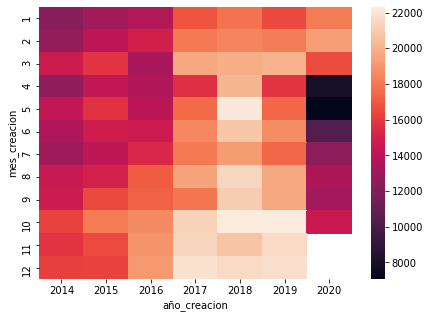

In [110]:
año_x_mes_creacion = data_clean[['año_creacion', 'mes_creacion']].groupby(['año_creacion', 'mes_creacion']).\
size().reset_index(name='n').query('año_creacion != 2013').pivot("mes_creacion", "año_creacion","n")

f = plt.subplots(figsize = (7,5))
ax = sns.heatmap(año_x_mes_creacion)

### Llamadas por delegación

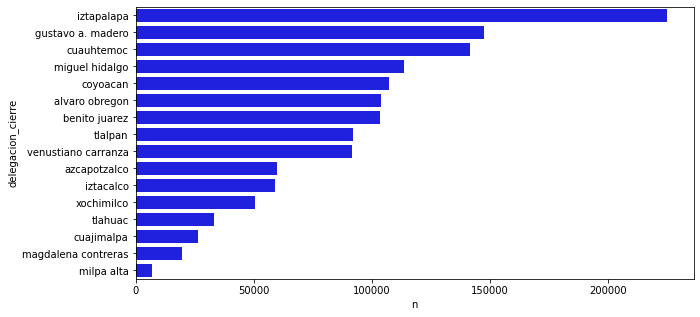

In [113]:
llamadas_x_deleg = data_clean.groupby(['delegacion_cierre']).size().reset_index(name = "n").sort_values("n", ascending = False)

f = plt.subplots(figsize = (10,5))
ax = sns.barplot(data = llamadas_x_deleg, x = 'n', y = 'delegacion_cierre', color= 'b')

### Llamadas por año

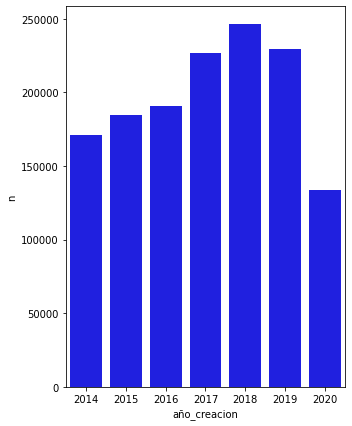

In [116]:
llamadas_x_año = data_clean.query('año_creacion != 2013').groupby(['año_creacion']).size().reset_index(name = "n").sort_values("n", ascending = False)
llamadas_x_año['año_creacion'] = llamadas_x_año['año_creacion'].astype("object")

f = plt.subplots(figsize = (5,7))
ax = sns.barplot(data = llamadas_x_año, y = 'n', x = 'año_creacion', color= 'b')

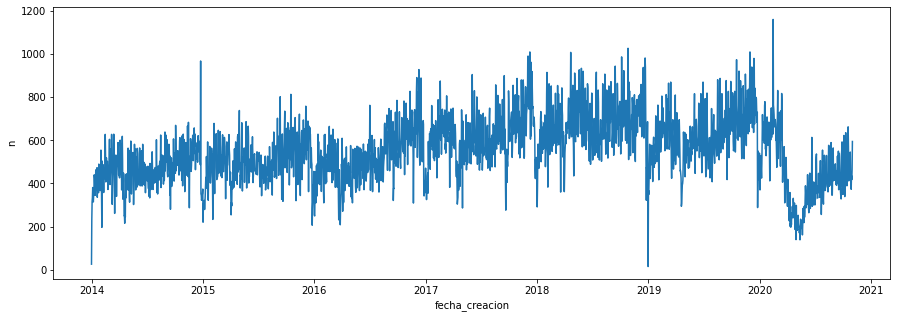

In [91]:
llamadas_diarias = data_clean.groupby(['fecha_creacion']).size().reset_index(name = "n")
f = plt.subplots(figsize = (15,5))
ax = sns.lineplot(data = llamadas_diarias, x = 'fecha_creacion', y = 'n')

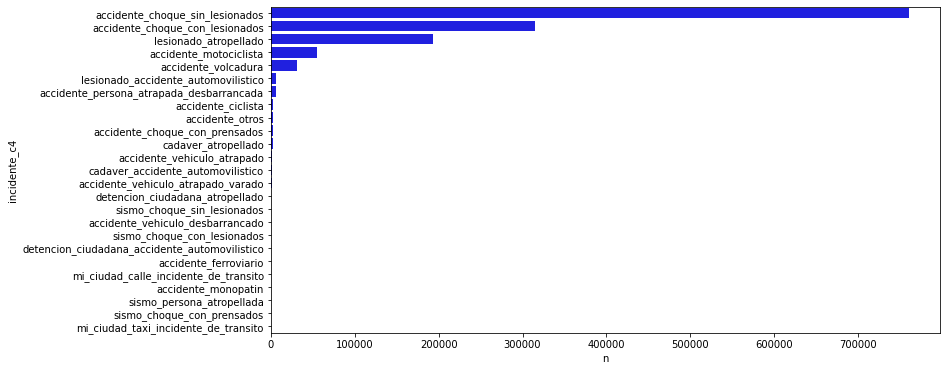

In [94]:
llamadas_x_incidente = data_clean.groupby(['incidente_c4']).size().reset_index(name = "n").sort_values("n", ascending = False)
f = plt.subplots(figsize = (12,6))
ax = sns.barplot(data = llamadas_x_incidente, x = 'n', y = 'incidente_c4', color= 'b')

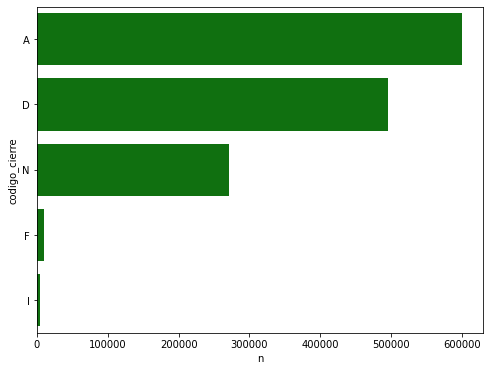

In [111]:
llamadas_x_codigo_cierre = data_clean.groupby(['codigo_cierre']).size().reset_index(name = "n").sort_values("n", ascending = False)
f = plt.subplots(figsize = (8,6))
ax = sns.barplot(data = llamadas_x_codigo_cierre, x = 'n', y = 'codigo_cierre', color= 'g')

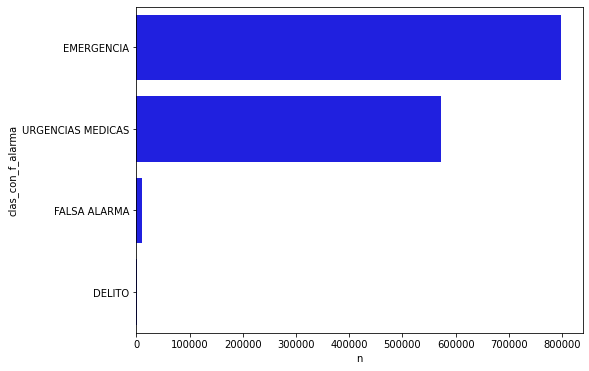

In [112]:
llamadas_x_clas = data_clean.groupby(['clas_con_f_alarma']).size().reset_index(name = "n").sort_values("n", ascending = False)
f = plt.subplots(figsize = (8,6))
ax = sns.barplot(data = llamadas_x_clas, x = 'n', y = 'clas_con_f_alarma', color= 'b')